In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [21]:
test_concrete = pd.read_csv('../Cases/Concrete_Strength/testConcrete.csv')
concrete = pd.read_csv('../Cases/Concrete_Strength/Concrete_Data.csv')

<h1 style = 'color: Orange'>Linear Regresssion</h1>

In [23]:
lr = LinearRegression()
X = concrete.drop('Strength', axis = 1)
y = concrete['Strength']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print(r2_score(y_test,y_pred))

y_ts = lr.predict(test_concrete)
y_ts


0.6351839142464111


array([68.48219627, 30.93697383, 20.74576179, 44.44013771, 61.09431869,
       20.97709473, 47.70301712, 81.84355007, 34.60923904, 46.85945965,
       44.87653556, 64.53690014, 49.66937193, 17.44032658])

<h1 style = 'color: Orange'>Polynomial Regresssion</h1>

In [30]:
poly = PolynomialFeatures(degree=2 ,include_bias=False)
X = concrete.drop('Strength', axis = 1)
y = concrete['Strength']

X_poly = poly.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.3,random_state=25)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))


y_ts = lr.predict(poly.fit_transform(test_concrete))
y_ts


0.7804851192335079
5.929922276487547


array([  77.56407746,   53.06868613,   49.00694468,  -15.80509621,
         35.60123287, -234.17122479,  -55.96624335,  114.38964641,
        -70.26553791, -188.87326879,   60.72325514,  -22.32444249,
        -67.12830599,    0.59062309])

In [31]:
poly = PolynomialFeatures(degree=3 ,include_bias=False)
X = concrete.drop('Strength', axis = 1)
y = concrete['Strength']

X_poly = poly.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.3,random_state=25)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))


y_ts = lr.predict(poly.transform(test_concrete))
y_ts


0.7740644562721799
5.186728770796333


array([   34.48305856,    26.48953921,   121.2391813 ,   235.12984272,
        -120.66095183,  -684.99731081,   577.53772252,    50.80867823,
        -306.40703652, -1155.66350156,    52.19133561,  -337.55507336,
         264.45624628,   357.25678261])

In [35]:
# Build the best model on whole data
poly = PolynomialFeatures(degree=3).set_output(transform='pandas')
X_poly = poly.fit_transform(X)
lr.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
# Unlabelled Data

test_concrete = pd.read_csv('../Cases/Concrete_Strength/testConcrete.csv')
test_concrete_poly = poly.transform(test_concrete)

# Inferencing

lr.predict(test_concrete_poly)

array([  39.11034699,   -6.21617795,  107.15140697, -165.56661182,
        156.18991362, 1044.4190933 ,  110.1685355 ,  142.0637889 ,
        342.41760603,  879.4336538 ,   62.4455465 ,  448.7277354 ,
       -116.58908279,  477.8581924 ])

<h1 style = 'color: Orange'>Ridge Regression</h1>

,alpha,error
0,0.001,7.708183
1,0.010,7.708183
2,0.100,7.708183
3,0.500,7.708184
4,1.000,7.708184
5,1.500,7.708185
6,2.000,7.708186
7,2.500,7.708187


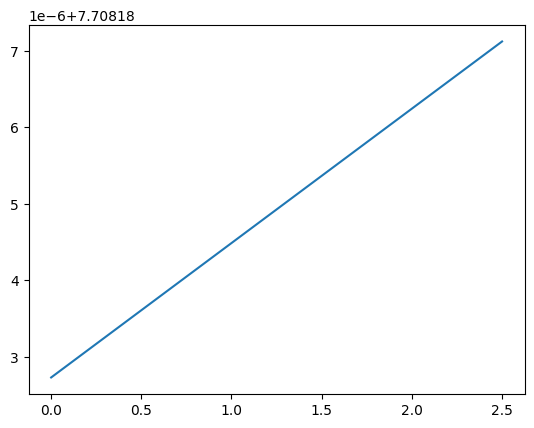

In [40]:

X = concrete.drop('Strength', axis = 1)
y = concrete['Strength']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

alphas = [0.001,0.01,0.1,0.5,1,1.5,2,2.5]
score = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    score.append([a,mean_absolute_error(y_pred,y_test)])
df = pd.DataFrame(score,columns = ['alpha','error'])
plt.plot(df['alpha'],df['error'])
df.sort_values('error')

<h1 style = 'color: Orange'>Lasso Regression</h1>

,alpha,error
0,0.001,7.708198
1,0.010,7.708334
2,0.100,7.709691
3,0.500,7.715714
4,1.000,7.723271
5,1.500,7.731425
6,2.000,7.740793
7,2.500,7.752211


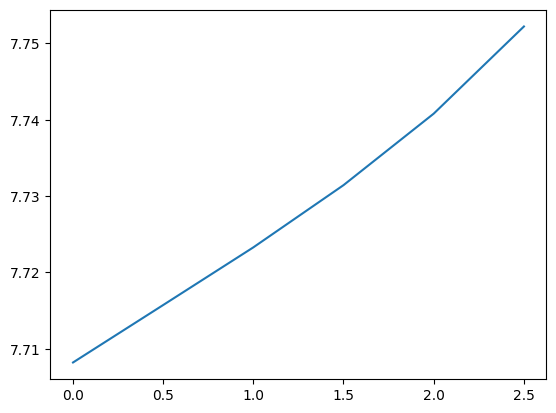

In [41]:

X = concrete.drop('Strength', axis = 1)
y = concrete['Strength']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

alphas = [0.001,0.01,0.1,0.5,1,1.5,2,2.5]
score = []

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    score.append([a,mean_absolute_error(y_pred,y_test)])
df = pd.DataFrame(score,columns = ['alpha','error'])
plt.plot(df['alpha'],df['error'])

df.sort_values('error')

<h1 style = 'color: Orange'>Elasti Net Regression</h1>

In [42]:
X = concrete.drop('Strength', axis = 1)
y = concrete['Strength']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=25)

alphas = [0.001,0.01,0.1,0.5,1,1.5,2,2.5]
ratios = [0.001,0.025,0.5,0.75,1]
scores = []
for a in alphas:
    for r in ratios:
        elastic = ElasticNet(alpha = a,l1_ratio = r)
        elastic.fit(X_train,y_train)
        y_pred = elastic.predict(X_test)
        scores.append([a,r,mean_absolute_error(y_test,y_pred)])

df = pd.DataFrame(scores,columns=['alpha','l1_ratio','error'])

df.sort_values('error')

,alpha,l1_ratio,error
0,0.001,0.001,7.708184
1,0.001,0.025,7.708184
2,0.001,0.500,7.708191
3,0.001,0.750,7.708194
5,0.010,0.001,7.708196
4,0.001,1.000,7.708198
6,0.010,0.025,7.708199
7,0.010,0.500,7.708264
8,0.010,0.750,7.708299
10,0.100,0.001,7.708309
